In [ ]:
INSERT INTO weather_table(id, time, temperature_site1, humidity_site1, temperature_site2, humidity_site2)
VALUES (0,'01/03/2018 00:00:00',NULL,NULL,23.1,61.6);!wget https://raw.githubusercontent.com/Dinesh-Adhithya-H/Internet-of-Things/main/weather_data_2sites.csv

--2021-11-13 17:55:23--  https://raw.githubusercontent.com/Dinesh-Adhithya-H/Internet-of-Things/main/weather_data_2sites.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 263612 (257K) [text/plain]
Saving to: ‘weather_data_2sites.csv’

weather_data_2sites 100%[===================>] 257.43K  --.-KB/s    in 0.03s   

2021-11-13 17:55:23 (7.99 MB/s) - ‘weather_data_2sites.csv’ saved [263612/263612]



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("weather_data_2sites.csv")

In [ ]:
data

,Unnamed: 0,timestamp,temperature_site1,humidity_site1,temperature_site2,humidity_site2
0,0,2018-03-01 00:00:00,NaN,NaN,23.1,61.6
1,1,2018-03-01 00:30:00,21.0,68.0,22.9,61.1
2,2,2018-03-01 01:00:00,20.0,73.0,23.0,61.6
3,3,2018-03-01 01:30:00,20.0,73.0,22.9,62.5
4,4,2018-03-01 02:00:00,20.0,73.0,22.4,63.4
...,...,...,...,...,...,...
5775,5775,2018-06-29 01:00:00,28.0,84.0,31.1,67.2
5776,5776,2018-06-29 01:30:00,28.0,84.0,31.1,67.2
5777,5777,2018-06-29 02:00:00,28.0,84.0,31.1,67.2
5778,5778,2018-06-29 02:30:00,28.0,84.0,31.1,67.2


In [ ]:
sum=15 # last 3 digits of roll no. sum
data["timestamp"]=pd.to_datetime(data["timestamp"])

In [ ]:
data_plot=data[np.logical_and(data["timestamp"]<"2018-03-20 00:00:00", "2018-03-15 00:00:00"<=data["timestamp"])][["timestamp","temperature_site1","humidity_site1"]]

In [ ]:
data_plot

,timestamp,temperature_site1,humidity_site1
674,2018-03-15 00:00:00,24.0,38.0
675,2018-03-15 00:30:00,23.0,41.0
676,2018-03-15 01:00:00,22.0,46.0
677,2018-03-15 01:30:00,22.0,46.0
678,2018-03-15 02:00:00,22.0,46.0
...,...,...,...
909,2018-03-19 21:30:00,27.0,39.0
910,2018-03-19 22:00:00,26.0,36.0
911,2018-03-19 22:30:00,25.0,40.0
912,2018-03-19 23:00:00,24.0,44.0


In [ ]:
time=[]
date=[]
temp=[]
hum=[]
for i in range(data_plot.shape[0]):
  td=str(data_plot.iloc[i]["timestamp"]).split()
  date.append(td[0])
  time.append(td[1])
  temp.append(data_plot.iloc[i]["temperature_site1"])
  hum.append(data_plot.iloc[i]["humidity_site1"])

In [ ]:
data_new=pd.DataFrame({"TIME":time,"DATE":date,"TEMPERATURE":temp,"HUMIDITY":hum})

In [ ]:
data_new

,TIME,DATE,TEMPERATURE,HUMIDITY
0,00:00:00,2018-03-15,24.0,38.0
1,00:30:00,2018-03-15,23.0,41.0
2,01:00:00,2018-03-15,22.0,46.0
3,01:30:00,2018-03-15,22.0,46.0
4,02:00:00,2018-03-15,22.0,46.0
...,...,...,...,...
235,21:30:00,2018-03-19,27.0,39.0
236,22:00:00,2018-03-19,26.0,36.0
237,22:30:00,2018-03-19,25.0,40.0
238,23:00:00,2018-03-19,24.0,44.0


In [ ]:
dates=np.unique(data_new["DATE"])

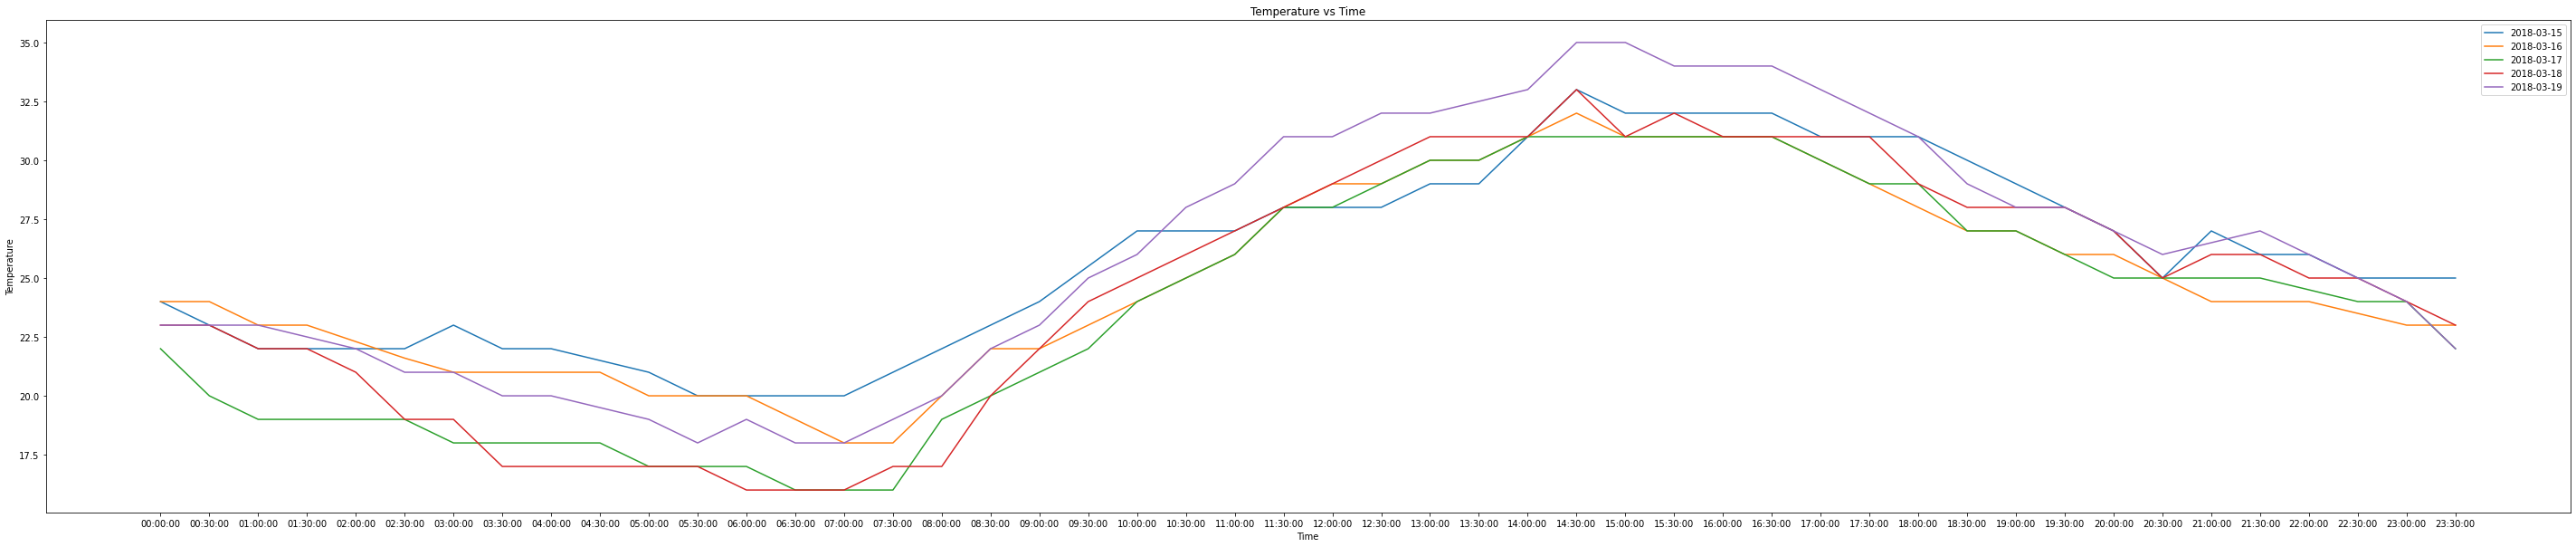

In [ ]:
plt.figure(figsize=(50,10))
for i in range(len(dates)):
  temp=data_new[data_new["DATE"]==dates[i]]
  plt.plot(temp["TIME"],temp["TEMPERATURE"],label=dates[i])
plt.title("Temperature vs Time")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.legend()

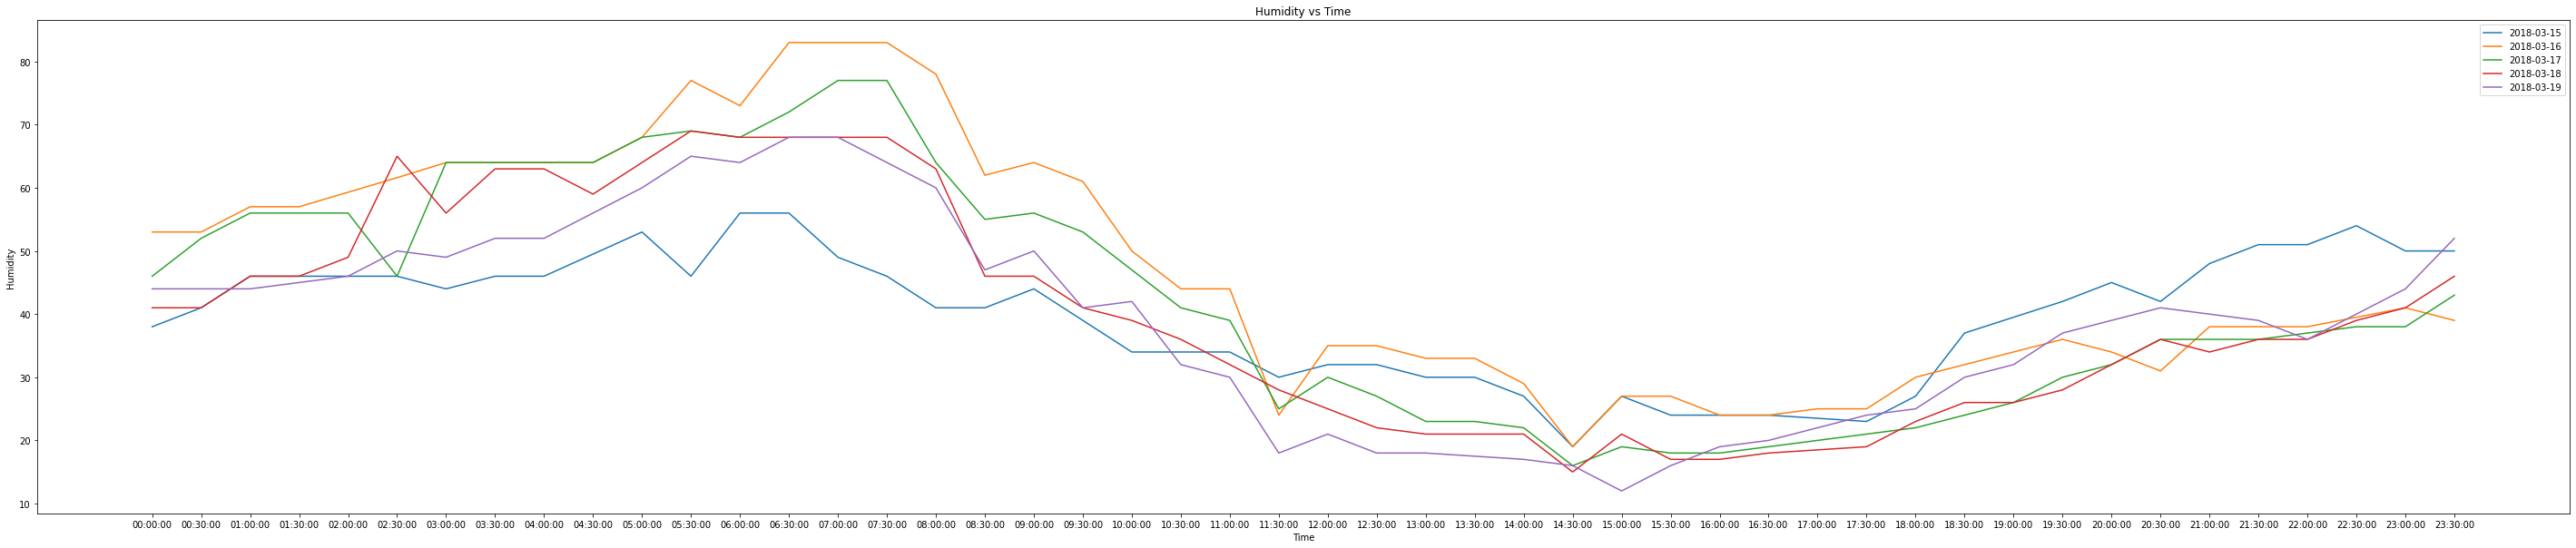

In [ ]:
plt.figure(figsize=(50,10))
for i in range(len(dates)):
  temp=data_new[data_new["DATE"]==dates[i]]
  plt.plot(temp["TIME"],temp["HUMIDITY"],label=dates[i])
plt.title("Humidity vs Time")
plt.xlabel("Time")
plt.ylabel("Humidity")
plt.legend()

No handles with labels found to put in legend.


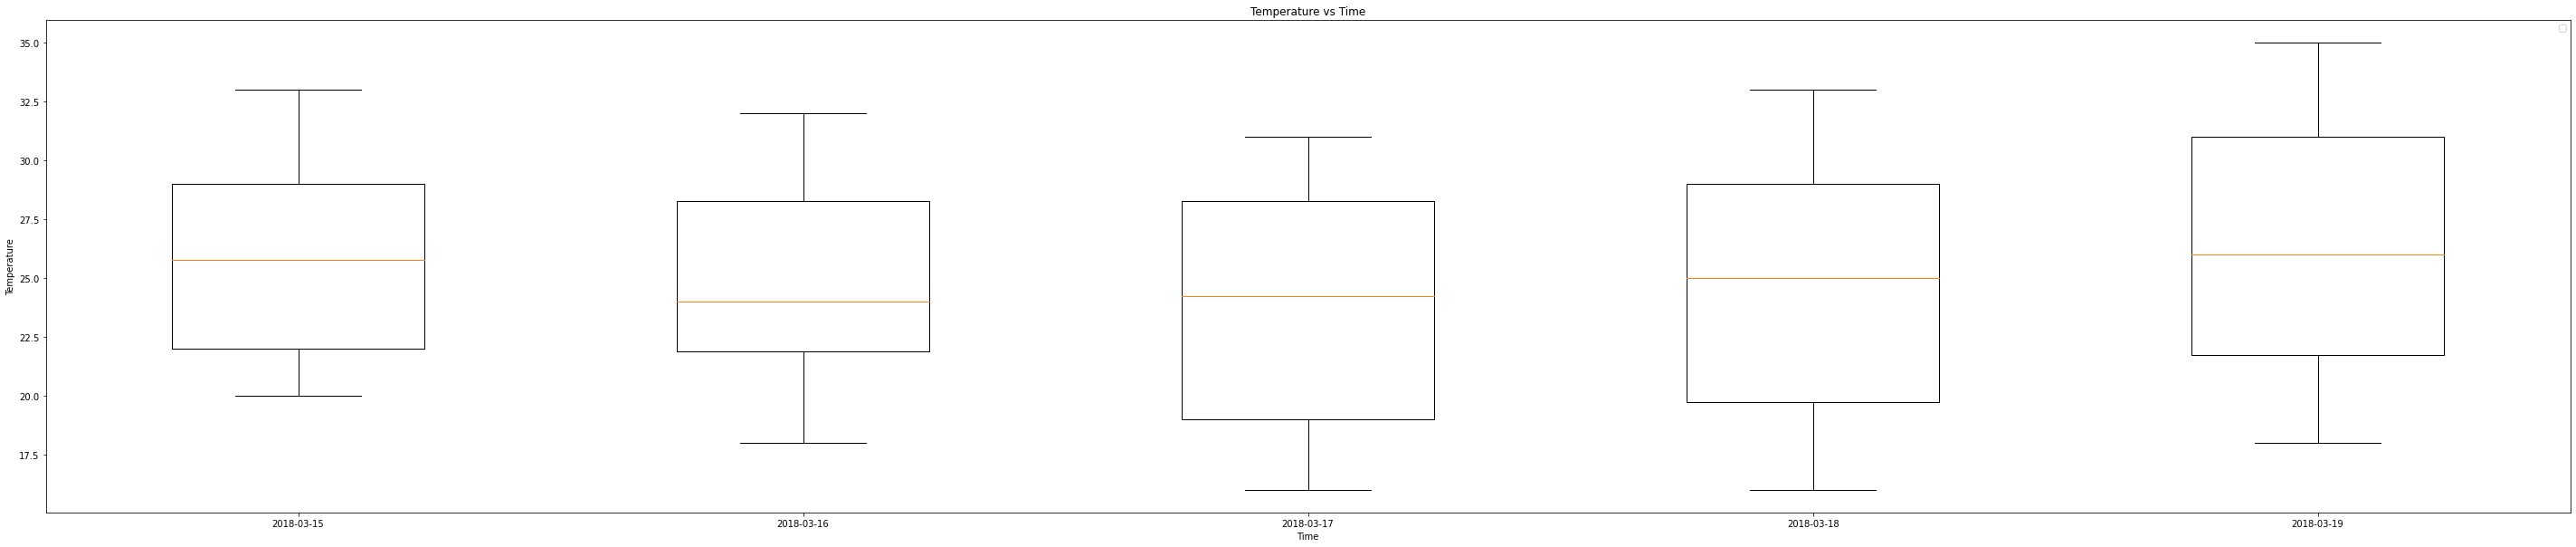

In [ ]:
plt.figure(figsize=(50,10))
temp=[]
for i in range(len(dates)):
  temp.append(data_new[data_new["DATE"]==dates[i]]["TEMPERATURE"])

plt.boxplot(temp)
plt.title("Temperature vs Time")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.xticks([1, 2, 3,4,5],dates)
plt.legend()
plt.show()

No handles with labels found to put in legend.


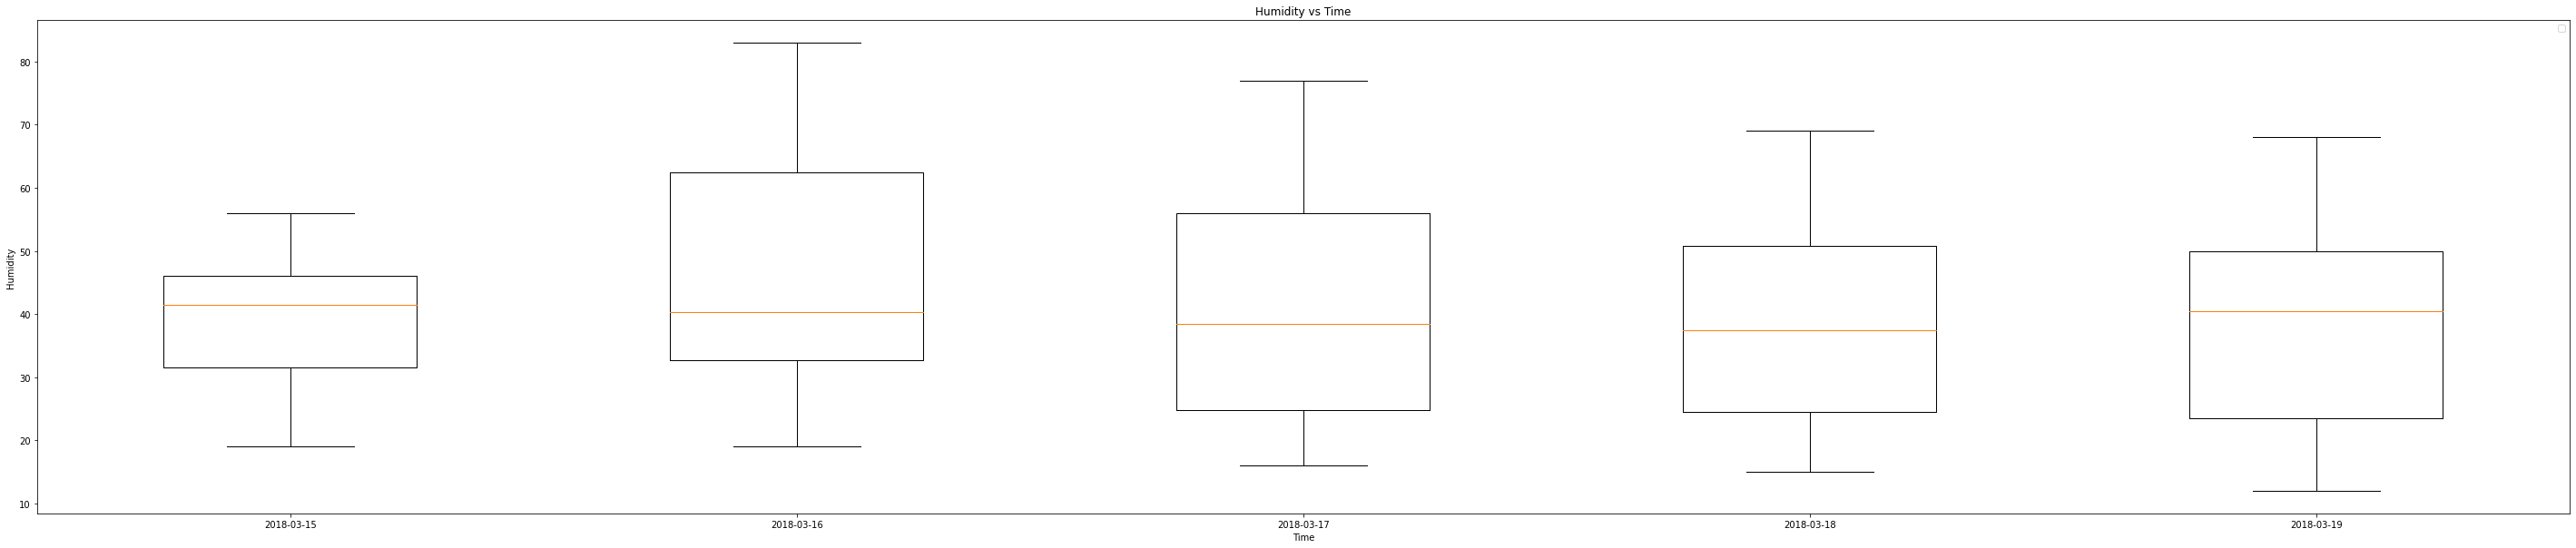

In [ ]:
plt.figure(figsize=(50,10))
temp=[]
for i in range(len(dates)):
  temp.append(data_new[data_new["DATE"]==dates[i]]["HUMIDITY"])

plt.boxplot(temp)
plt.title("Humidity vs Time")
plt.xlabel("Time")
plt.ylabel("Humidity")
plt.xticks([1, 2, 3,4,5],dates)
plt.legend()
plt.show()

In [ ]:
df=pd.DataFrame()
for i in range(3):
  temp=data_new[data_new["DATE"]==dates[i]]
  df["Temperature day "+str(i+1)]=list(temp["TEMPERATURE"])
  df["Humility day "+str(i+1)]=list(temp["HUMIDITY"])

In [ ]:
df;

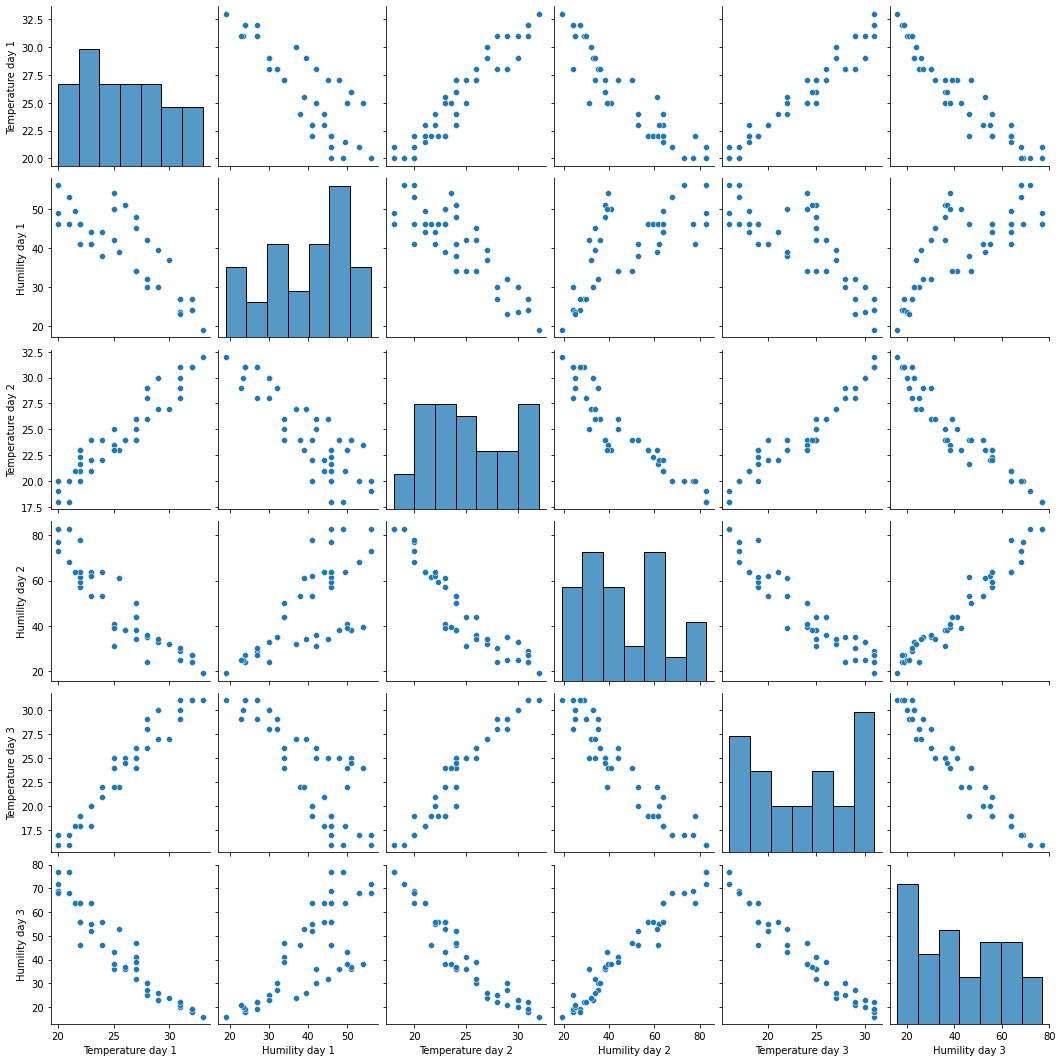

In [ ]:
sns.pairplot(data=df)

# Component # 2: Analysis

In [ ]:
DATA["temperature_site1"]

0        NaN
1       21.0
2       20.0
3       20.0
4       20.0
        ... 
5775    28.0
5776    28.0
5777    28.0
5778    28.0
5779    28.0
Name: temperature_site1, Length: 5780, dtype: float64

In [ ]:
Syn_weather=pd.DataFrame()
DATA=data.drop(["Unnamed: 0"],axis=1)
time=[]
for i in range(5780):
  time.append(DATA["timestamp"].iloc[i].weekday())
minute=[]
for i in range(5780):
  minute.append((DATA["timestamp"].iloc[i].minute)+DATA["timestamp"].iloc[i].hour*60)
temp_previous=np.array(DATA.iloc[:5779][["temperature_site1"]])
Syn_weather[["temperature_site","humidity_site"]]=DATA.iloc[1:][["temperature_site1","humidity_site1"]]
Syn_weather["previous_temperature"]=temp_previous
Syn_weather["week_day"]=time[1:]
Syn_weather["minutes_of_day"]=minute[1:]

In [ ]:
Syn_weather.columns

Index(['temperature_site', 'humidity_site', 'previous_temperature', 'week_day',
       'minutes_of_day'],
      dtype='object')

In [ ]:
Syn_weather

,temperature_site,humidity_site,previous_temperature,week_day,minutes_of_day
1,21.0,68.0,NaN,3,30
2,20.0,73.0,21.0,3,60
3,20.0,73.0,20.0,3,90
4,20.0,73.0,20.0,3,120
5,20.0,70.0,20.0,3,150
...,...,...,...,...,...
5775,28.0,84.0,28.0,4,60
5776,28.0,84.0,28.0,4,90
5777,28.0,84.0,28.0,4,120
5778,28.0,84.0,28.0,4,150


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import sklearn 

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(Syn_weather[['humidity_site', 'previous_temperature', 'week_day','minutes_of_day']],Syn_weather['temperature_site'],train_size=0.66)

In [ ]:
x_train

,humidity_site,previous_temperature,week_day,minutes_of_day
4661,44.9,36.7,1,1200
817,42.4,28.4,5,1410
2839,46.6,33.0,5,1410
3399,26.1,37.5,3,930
798,46.2,28.5,5,840
...,...,...,...,...
2651,25.6,31.4,2,120
4805,59.3,34.7,4,1200
4569,53.6,33.0,6,1320
3072,49.0,30.8,3,1200


In [ ]:
lr_model=LinearRegression().fit(np.array(x_train),np.array(y_train))
mean_squared_error(lr_model.predict(np.array(x_test)),np.array(y_test))**0.5

0.5084643055661553

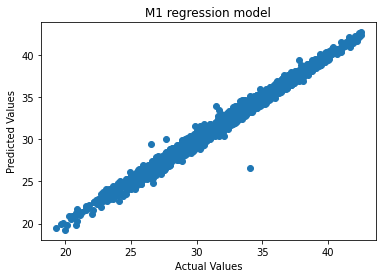

In [ ]:
plt.scatter(y_test,lr_model.predict(x_test))
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("M1 regression model")
plt.show()

In [ ]:
X=np.array(Syn_weather[['humidity_site', 'previous_temperature', 'week_day','minutes_of_day']])
Y=np.array(Syn_weather['temperature_site'])

In [ ]:
reg_mod2 = LinearRegression()
cv = KFold(n_splits=10, random_state=1, shuffle=False)
scores = cross_val_score(reg_mod2, X, Y,scoring="neg_root_mean_squared_error" ,cv=cv, n_jobs=-1)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
Syn_weather.columns

Index(['temperature_site', 'humidity_site', 'previous_temperature', 'week_day',
       'minutes_of_day'],
      dtype='object')

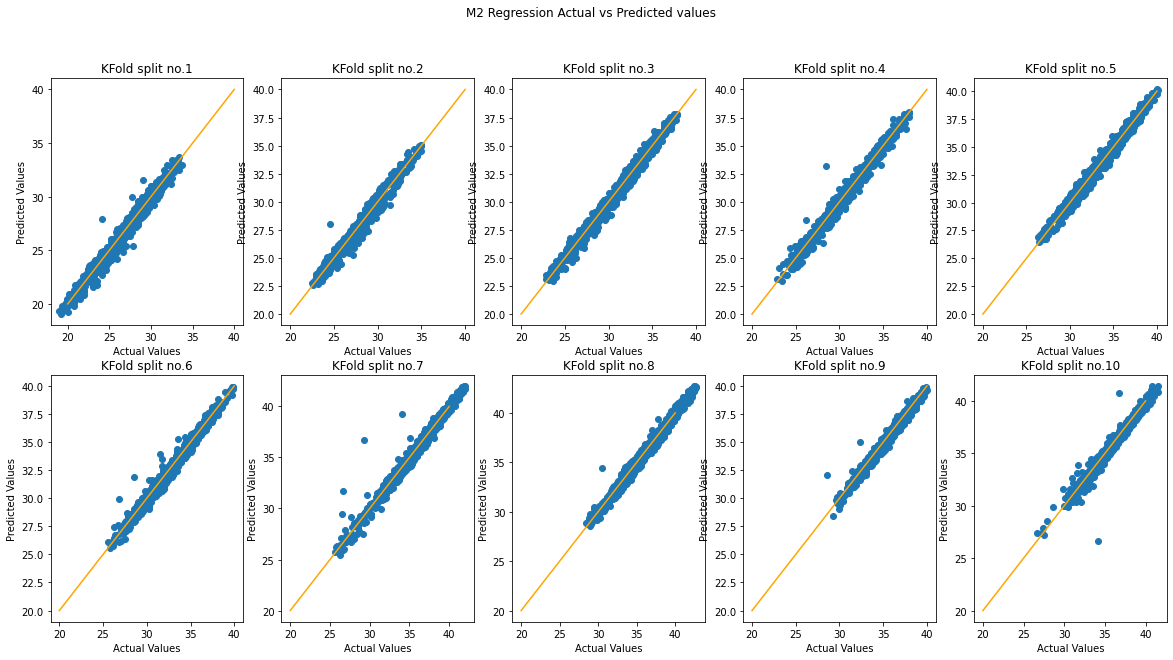

In [ ]:
i=1
plt.figure(figsize=(20,10))
plt.suptitle("M2 Regression Actual vs Predicted values")
features=['humidity_site', 'previous_temperature', 'week_day',
       'minutes_of_day']
for train_index, test_index in cv.split(X):
  X_train = Syn_weather.iloc[train_index].loc[:, features]
  X_test = Syn_weather.iloc[test_index][features]
  y_train = Syn_weather.iloc[train_index].loc[:,'temperature_site']
  y_test = Syn_weather.iloc[test_index]['temperature_site']


  M2=LinearRegression()
  M2.fit(X_train,y_train)
  
  plt.subplot(2,5,i)
 
  plt.scatter(y_test,M2.predict(X_test))
  #plt.plot([0,0],[45,45])
  plt.xlabel("Actual Values")
  plt.ylabel("Predicted Values")
  plt.title("KFold split no."+str(i))

  plt.plot([20,40],[20,40],color="orange")

  i+=1
plt.show()

In [ ]:
scores*-1

array([0.59095253, 0.48902806, 0.49232317, 0.52696451, 0.45733666,
       0.48618446, 0.62988745, 0.45959622, 0.39534381, 0.54279907])

In [ ]:
np.mean(scores*-1)

0.5070415935013529

In [ ]:
import statsmodels.api as sm
results = sm.OLS(Syn_weather["temperature_site"], Syn_weather[['humidity_site', 'previous_temperature', 'week_day','minutes_of_day']]).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:       temperature_site   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          5.761e+06
Date:                Sat, 13 Nov 2021   Prob (F-statistic):                        0.00
Time:                        18:11:54   Log-Likelihood:                         -4340.4
No. Observations:                5779   AIC:                                      8689.
Df Residuals:                    5775   BIC:                                      8715.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

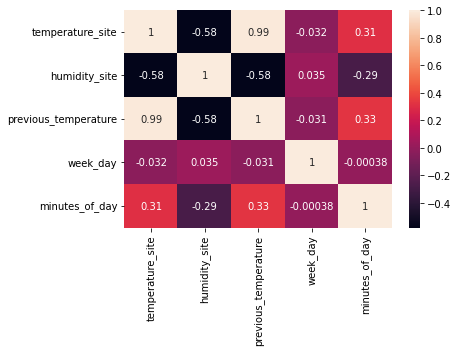

In [ ]:
sns.heatmap(Syn_weather.corr(),annot=True)
plt.show()

In [ ]:
y_test.shape

(577,)

In [ ]:
lr_model.predict(x_test).shape

(1965,)